In [2]:
# https://www.youtube.com/watch?v=wQ8BIBpya2k
# pip install h5py

import tensorflow as tf
import h5py
import cv2
import numpy as np 
import matplotlib.pyplot as plt

num_model = tf.keras.models.load_model('Num_LeNet-3-conv-64-nodes-2-dense-1570165041.model')


In [3]:
drawing = False # true if mouse is pressed
pt1_x , pt1_y = None , None
line_thickness = 16

# mouse callback function
def line_drawing(event,x,y,flags,param):
    global pt1_x,pt1_y,drawing

    if event==cv2.EVENT_LBUTTONDOWN:
        drawing=True
        pt1_x,pt1_y=x,y

    elif event==cv2.EVENT_MOUSEMOVE:
        if drawing==True:
            cv2.line(img,(pt1_x,pt1_y),(x,y),color=(0,0,0),thickness=line_thickness)
            pt1_x,pt1_y=x,y
    elif event==cv2.EVENT_LBUTTONUP:
        drawing=False
        cv2.line(img,(pt1_x,pt1_y),(x,y),color=(0,0,0),thickness=line_thickness)        

def img_2_array(img):
    height = img.shape[0]
    width = img.shape[1]
    channels = img.shape[2]
    if channels == 3:
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        
    array = np.zeros([height, width])
    print(type(array))
    
    # array[:] = img[:]
    for i in range(0, height):
        for j in range(0, width):
            array[i][j] = img[i][j]
            
    return array

def colorscale_2_gray(img):
    height = img.shape[0]
    width = img.shape[1]
    img_gray = np.zeros((height,width,1), np.uint8)
    
    for i in range(height):
        for j in range(width):
            img_gray[i][j] = np.average(img[i][j])
    
    return img_gray


# img = np.zeros((256,256,3), np.uint8)
# img[:] = (255,255,255)

# ar = img_2_array(img)
# print(len(ar))

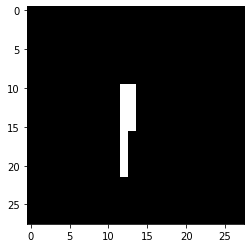

1


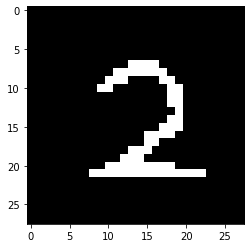

7


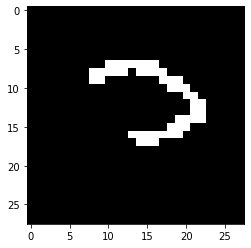

2


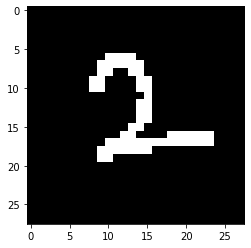

2


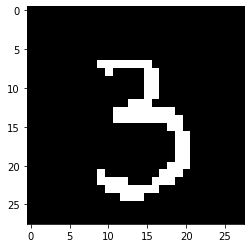

2


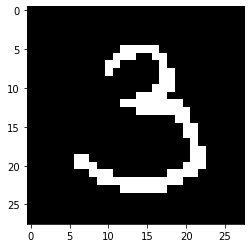

4


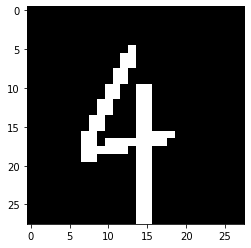

4


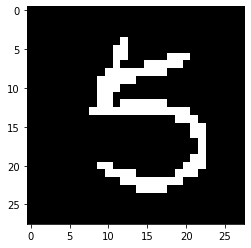

4


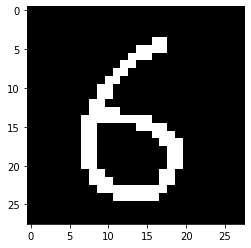

4


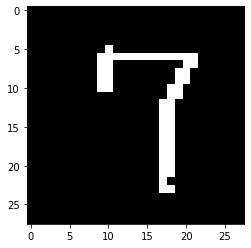

4


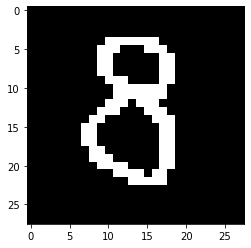

2


In [11]:

        
img = np.zeros((256,256,3), np.uint8)
img[:] = (255,255,255)
cv2.namedWindow('Number draw')
cv2.setMouseCallback('Number draw',line_drawing)

while(1):
    cv2.imshow('Number draw',img)
    key_in = cv2.waitKey(1) & 0xFF
    if key_in == 27:    # esc
        break
    elif key_in == 13:    #enter
        
    # run the desired code
        # change size to 28x28
        img_resize = cv2.resize(img, (28, 28), interpolation=cv2.INTER_LINEAR)
        # inver its value black-->0 ; white--> 255
        ret, img_resize = cv2.threshold(img_resize,0,255,cv2.THRESH_BINARY_INV)
#         print(img_resize.shape)
        plt.imshow(img_resize)
        plt.show()
        
        

        img_gray = colorscale_2_gray(img_resize)
        img_gray = tf.keras.utils.normalize(img_gray, axis=2)
#         print(img_gray.shape)

#         plt.imshow(img_gray)
#         plt.show()

        # predict
        predictions = num_model.predict([[img_gray]]) # predictions always a list
        print(np.argmax(predictions[0]))
        img[:] = (255,255,255)
        
cv2.destroyAllWindows()

In [ ]:
predictions = num_model.predict([x_test]) #predictions always a list